**Статистический анализ данных**

**Цель: Исследовать показатели сервиса аренды самокатов**

**Задачи:**
1) Установить, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверить гипотезу. Использовать исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
2) Установить, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Проверить гипотезу и сделать выводы. 
3) Проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделать вывод.
4) Смоделировать ситуацию, где после обновления сервера по работе с мобильными приложениями количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Решить, какой тест понадобился бы для проверки этой гипотезы.
5) Выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подобрать параметры распределения, описывающего эту ситуацию, построить график распределения и сформулировать ответ на вопрос о количестве промокодов.

**План исследования:**
1) Импорт библиотек, открытие и просмотр датасетов
2) Предобработка данных
3) Исследовательский анализ данных
4) Объединение данных
5) Подсчёт выручки
6) Проверка гипотез
7) Подбор распределения и расчёт количества промокодов
8) Общий вывод по исследованию

#### Шаг 1. Загрузка данных

In [7]:
#Импортирую библиотеки и модули, необходимые в работе:
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt

In [8]:
#Открытие датасетов, сохранение в переменную:
data_users = pd.read_csv('users_go.csv')
data_rides = pd.read_csv('rides_go.csv')
data_subsc = pd.read_csv('subscriptions_go.csv')

**Просмотр датасета data_users:**

In [9]:
#Просмотр первых 10 строк:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [10]:
#Просмотр типов данных в стобцах и количество строк:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [11]:
#Первичная описательная статистика:
data_users.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


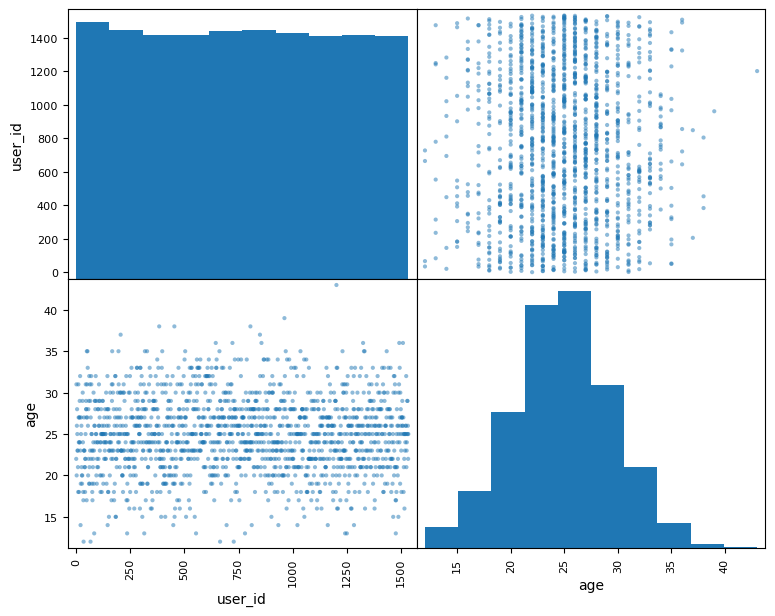

In [12]:
#Визуализация первичных данных через матрицу рассеяния:
pd.plotting.scatter_matrix(data_users, figsize=(9, 7))
plt.show()

**Просмотр датасета data_rides:**

In [13]:
#Просмотр первых 10 строк:
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [14]:
#Просмотр типов данных в стобцах и количество строк:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [15]:
#Первичная описательная статистика:
data_rides.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


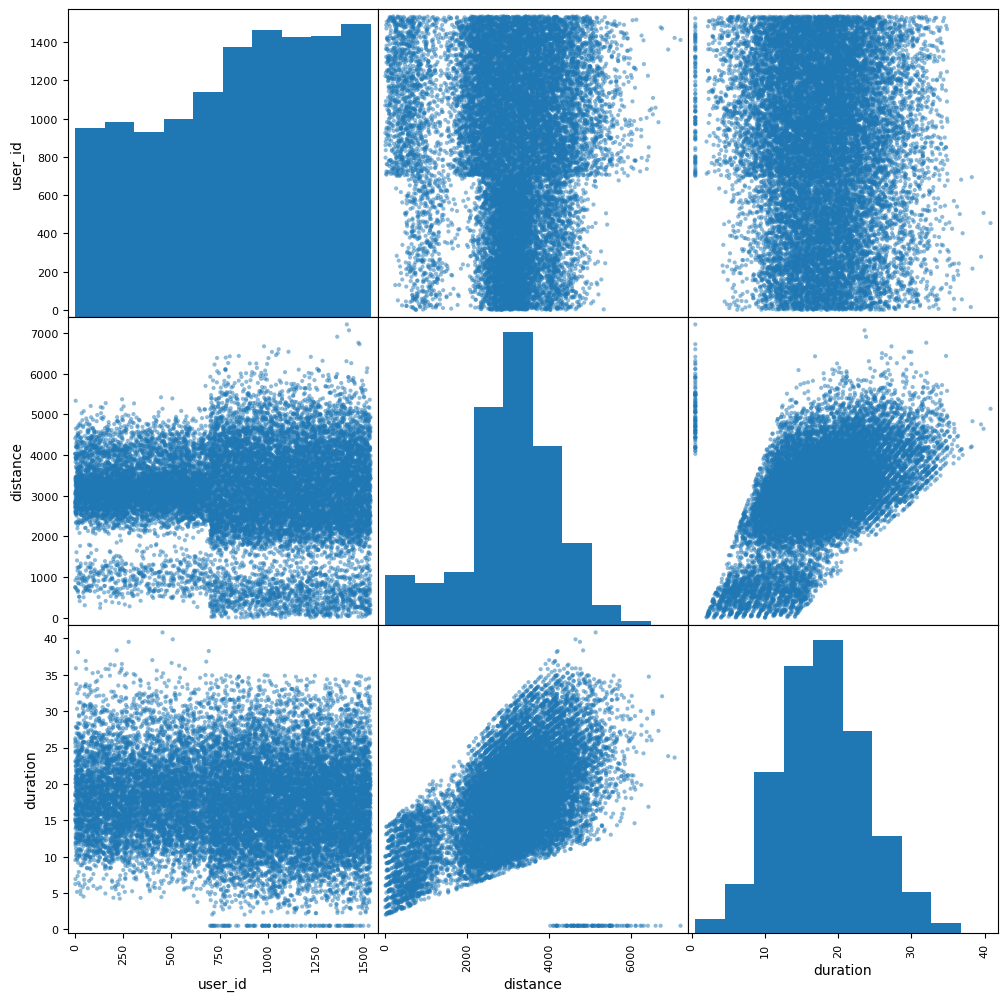

In [16]:
#Первичный просмотр данных через матрицу рассеяния:
pd.plotting.scatter_matrix(data_rides, figsize=(12, 12))
plt.show()

**Просмотр датасета data_subsc:**

In [17]:
#Просмотр первых строк:
data_subsc.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [18]:
#Просмотр типов данных в стобцах и количество строк:
data_subsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Послений датасет содержит условия пользования сервисом без подписки и с подпиской,\
поэтому более детальный просмотр датасета не нужен.

#### Шаг 2. Предобработка данных

**Предобработка датасета data_users:**

In [19]:
#Поиск явных дубликатов:
data_users.duplicated().value_counts()

False    1534
True       31
Name: count, dtype: int64

In [20]:
#Удаление явных дубликатов:
data_users = data_users.drop_duplicates()
#Проверка удаления дубликатов:
data_users.duplicated().value_counts()

False    1534
Name: count, dtype: int64

In [21]:
#Проверяем дубликаты в идентификаторами пользователей:
data_users['user_id'].duplicated().value_counts()

user_id
False    1534
Name: count, dtype: int64

In [22]:
#Оцениваем количество униклаьных начений в оставшихся столбцах, где можно проверить неявные дубликаты:
print(len(data_users['name'].unique()))
print(len(data_users['city'].unique()))

194
8


In [23]:
#Уникаьных имен слишком много (194), будем считать, что имена записаны корректно (для анализа несущественно)
#Проверяем неявные дубликаты в названиях городов (8):
data_users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

In [24]:
#Проверяем наличие пропусков в датасете:
data_users.isna().value_counts()

user_id  name   age    city   subscription_type
False    False  False  False  False                1534
Name: count, dtype: int64

**Предобработка датасета data_rides:**

In [25]:
#Преобразование формата даты в датасете с поездками:
pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

In [26]:
#Добавление в датасете с поездками столбца месяца поездки:
data_rides['month'] = pd.DatetimeIndex(data_rides['date']).month
#Проверяем создание столбца:
data_rides.head(10)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


In [27]:
#Поиск явных дубликатов:
data_rides.duplicated().value_counts()

False    18068
Name: count, dtype: int64

In [28]:
#Проверяем наличие пропусков в датасете:
data_rides.isna().value_counts()

user_id  distance  duration  date   month
False    False     False     False  False    18068
Name: count, dtype: int64

In [29]:
#Проверяем нулевые или аномально большие значения расстояний и длительности поездки,
#которые лучше удалить:
print(data_rides['distance'].min(), '\n')
print(data_rides['distance'].max(), '\n')
print(data_rides['duration'].min(), '\n')
print(data_rides['duration'].max())

0.855682925681208 

7211.007744598519 

0.5 

40.82396261922424


**Предобработка датасета data_subsc:**

**Выводы после предобработки:**\
Три датасета успешно загружены, тип даты приведен к формату pandas,\
во всех датасетах проверены явные и неявные дубликаты, пропуски, произведена очистка от дубликатов.\
В датасете с поездками проверено, имеются ли аномально длительные поездки или\
дистанции поездок, а также нулевые значения, которые стоит удалить и не брать в анализ.\
В этом же датасете добавлен столбец с месяцем поездки.\
Наименования столбцов датасетов корректны для анализа и объединения данных.

#### Шаг 3. Исследовательский анализ данных

In [30]:
#Частота встречаемости городов среди пользователей:
cities = data_users.pivot_table(
    index='city',
    values='user_id',
    aggfunc='count'
    ).sort_values(by='user_id')
print(cities)

                user_id
city                   
Москва              168
Тюмень              180
Омск                183
Сочи                189
Краснодар           193
Ростов-на-Дону      198
Екатеринбург        204
Пятигорск           219


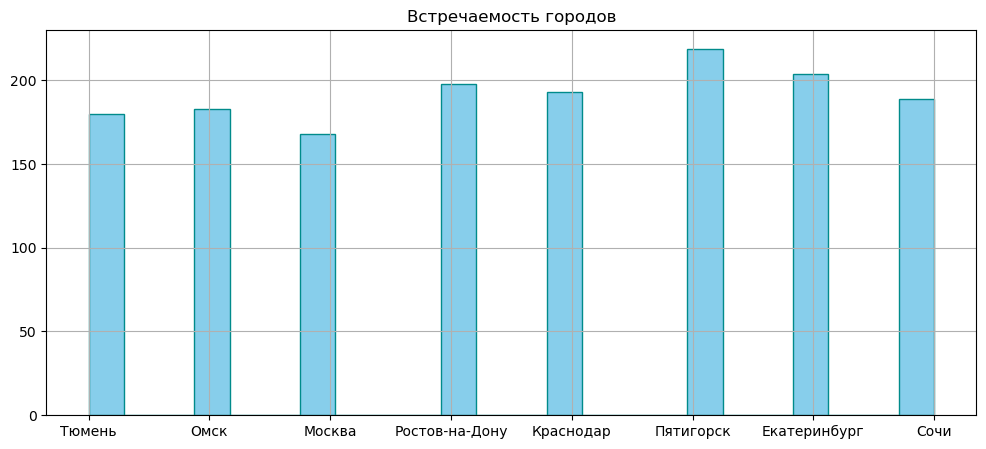

In [31]:
#Визуализация встречаемости городов:
data_users['city'].hist(
    bins=24,
    figsize=(12, 5),
    color='skyblue',
    edgecolor='darkcyan'
    )
plt.title('Встречаемость городов')
plt.show()

In [32]:
#Соотношение пользователей с подпиской и без подписки:
subsc_off = data_users.loc[data_users['subscription_type'] == 'free', 'subscription_type'].count() #Кол-во пользователей без подписки
subsc_off_share = (subsc_off / data_users['subscription_type'].count()).round(2) * 100 #Доля таких пользователей
subsc_on = data_users.loc[data_users['subscription_type'] == 'ultra', 'subscription_type'].count() #Кол-во пользователей с подпиской
subsc_on_share = (subsc_on / data_users['subscription_type'].count()).round(2) * 100 #Доля таких пользователей
print(f'Пользователей без подписки: {subsc_off} ({subsc_off_share} % от всех пользователей)')
print(f'Пользователей c подпиской: {subsc_on} ({subsc_on_share} % от всех пользователей)')


Пользователей без подписки: 835 (54.0 % от всех пользователей)
Пользователей c подпиской: 699 (46.0 % от всех пользователей)


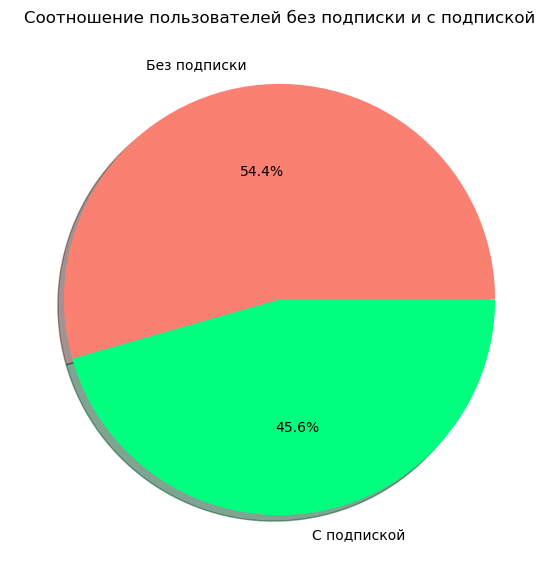

In [33]:
#Визуализация соотношения пользователей с подпиской и без подписки:
#Подготавливаем сводную таблицу с группировкой по типу подписки:
subsc_pie = data_users.pivot_table(
    index='subscription_type',
    values='user_id',
    aggfunc='count'
    ).reset_index()
#Полученную сводную таблицу визуализируем через круговую диаграмму:
plt.figure(figsize=(7, 7))
plt.pie(
    subsc_pie['user_id'],
    labels=('Без подписки', 'С подпиской'),
    colors=('salmon', 'springgreen'),
    shadow=True,
    autopct='%1.1f%%'
    )
plt.title('Соотношение пользователей без подписки и с подпиской')
plt.show()

In [34]:
#Описательная статистика возраста пользователей:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

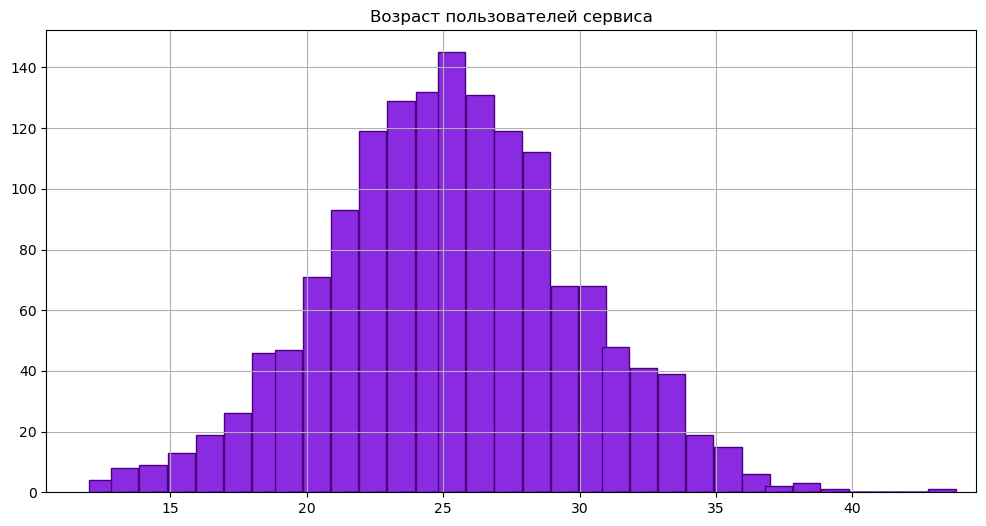

In [35]:
#Визуализация возраста пользователей:
plt.figure(figsize=(12, 6))
data_users['age'].hist(
    bins=150,
    width=1,
    color='blueviolet',
    edgecolor='indigo'
    )
plt.title('Возраст пользователей сервиса')
plt.show()

In [36]:
#Описательная статистика пройденного расстояния за поездку:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

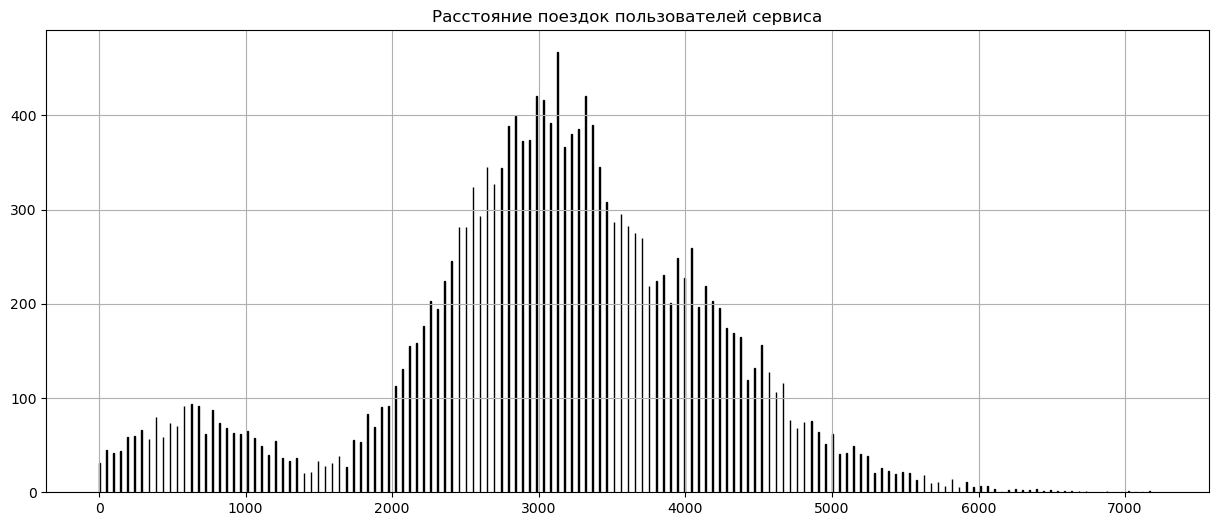

In [37]:
#Визуализация расстояний поездок:
plt.figure(figsize=(15, 6))
data_rides['distance'].hist(
    bins=150,
    width=5,
    color='grey',
    edgecolor='black'
    )
plt.title('Расстояние поездок пользователей сервиса')
plt.show()

In [38]:
#Описательная статистика длительности поездок:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

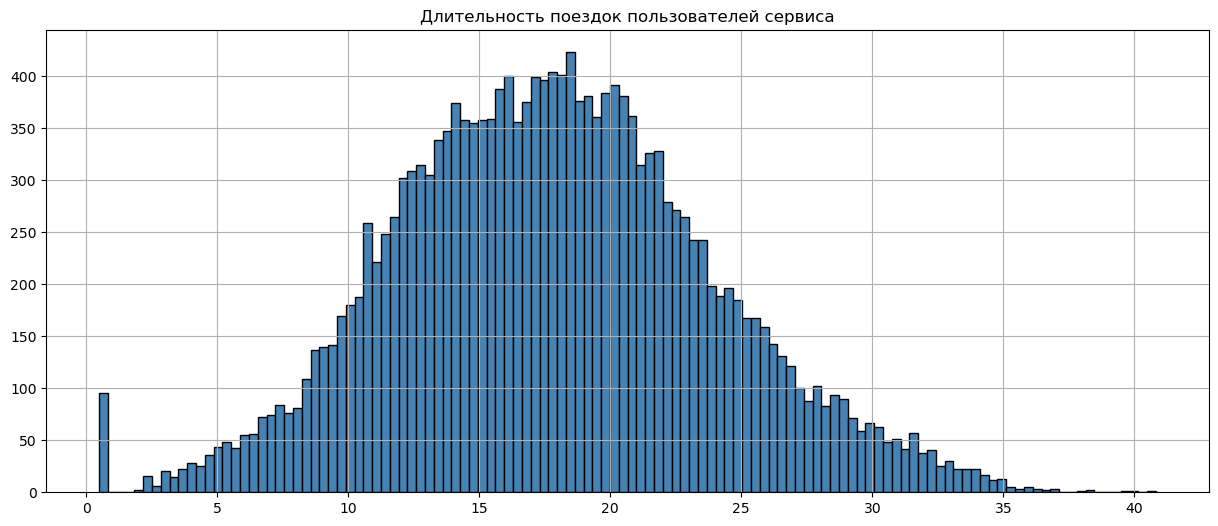

In [39]:
#Визуализация длительности поездок:
plt.figure(figsize=(15, 6))
data_rides['duration'].hist(
    bins=120,
    color='steelblue',
    edgecolor='black'
    )
plt.title('Длительность поездок пользователей сервиса')
plt.show()

**Выводы по исследовательскому анализу данных:**\
В данных близко к равномерному представлено ***8*** городов, в которых работал сервис аренды самокатов.\
Пользователей без подписки: ***835*** (***54.0 %*** от всех пользователей)\
Пользователей c подпиской: ***699*** (***46.0 %*** от всех пользователей)\
Средний возраст пользователя сервиса - ***25*** лет. Возраст пользователей нормально распределен от среднего.\
Среднее расстояние поездки - ***3000*** метров. Расстояние распределено близко к нормальному,\
но имеется второй пик, отражающий большое количество коротких поездок (примерно 600 метров).\
Средняя продолжительность поездки - ***17*** минут. Распределение продолжительности\
близко к нормальному, имеется выброс коротких поездок длительностью 1 минуты.

#### Шаг 4. Объединение данных

In [40]:
#Проверка размерности исходных датасетов:
print(data_users.shape)
print(data_rides.shape)
print(data_subsc.shape)

(1534, 5)
(18068, 5)
(2, 4)


In [41]:
#Объединение датасетов:
data = data_users.merge(data_rides, on='user_id').merge(data_subsc, on='subscription_type')

In [42]:
#Проверка результатов объединения датасетов:
data.head(10)
#Проверка размерности объединенного датасета:
print(data.shape)

(18068, 12)


In [43]:
#Датафрейм с пользователями без подписки:
data_subsc_off = data.loc[data['subscription_type'] == 'free']

In [44]:
#Описательная статистика расстояний поездок пользователей без подписки:
data_subsc_off['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

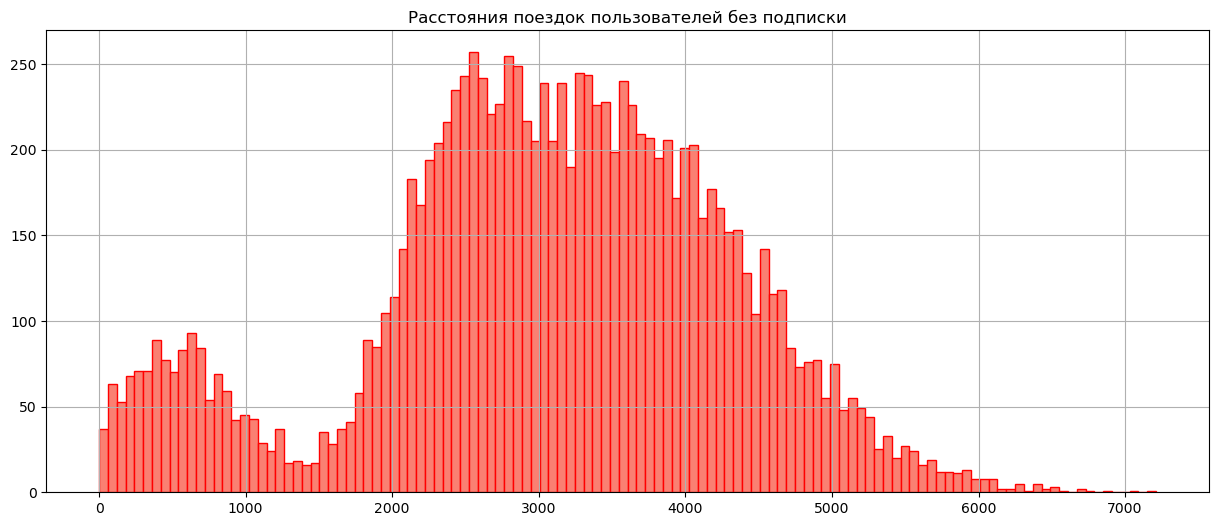

In [45]:
#Визуализация расстояний поездок пользователей без подписки:
plt.figure(figsize=(15, 6))
data_subsc_off['distance'].hist(
    bins=120,
    color='salmon',
    edgecolor='red'
    )
plt.title('Расстояния поездок пользователей без подписки')
plt.show()

In [46]:
#Описательная статистика длительности поездок пользователей без подписки:
data_subsc_off['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

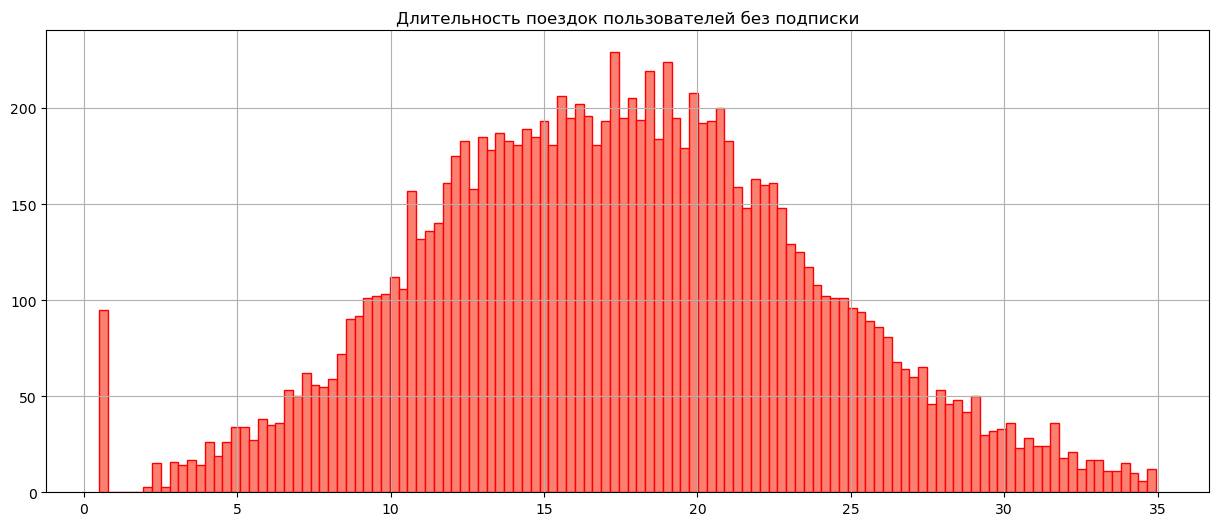

In [47]:
#Визуализация длительности поездок пользователей без подписки::
plt.figure(figsize=(15, 6))
data_subsc_off['duration'].hist(
    bins=120,
    color='salmon',
    edgecolor='red'
    )
plt.title('Длительность поездок пользователей без подписки')
plt.show()

In [48]:
#Датафрейм с пользователями с подпиской:
data_subsc_on = data.loc[data['subscription_type'] == 'ultra']

In [49]:
#Описательная статистика расстояний поездок пользователей с подпиской:
data_subsc_on['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

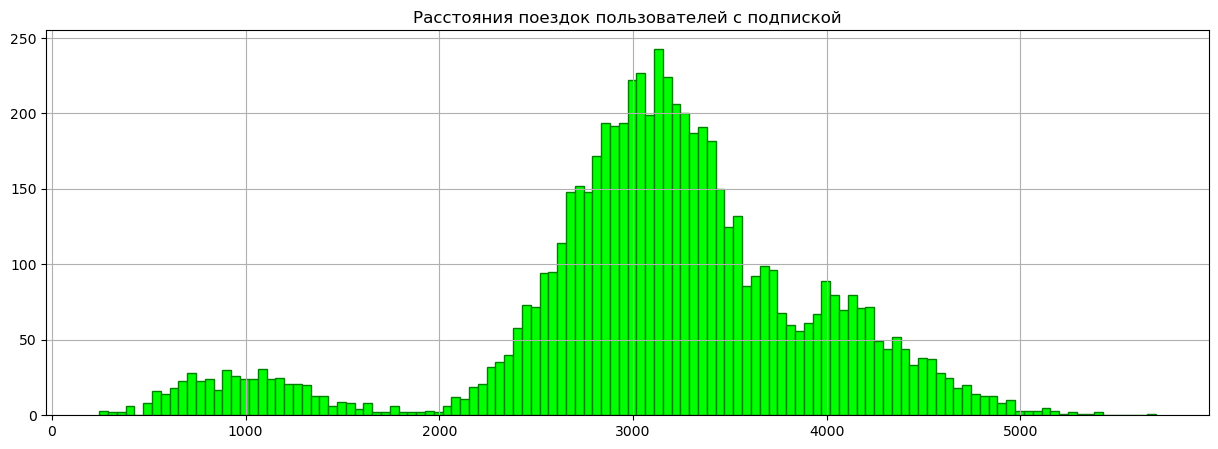

In [50]:
#Визуализация расстояний поездок пользователей с подпиской:
plt.figure(figsize=(15, 5))
data_subsc_on['distance'].hist(
    bins=120,
    color='lime',
    edgecolor='green'
    )
plt.title('Расстояния поездок пользователей с подпиской')
plt.show()

In [51]:
#Описательная статистика длительности поездок пользователей с подпиской:
data_subsc_on['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

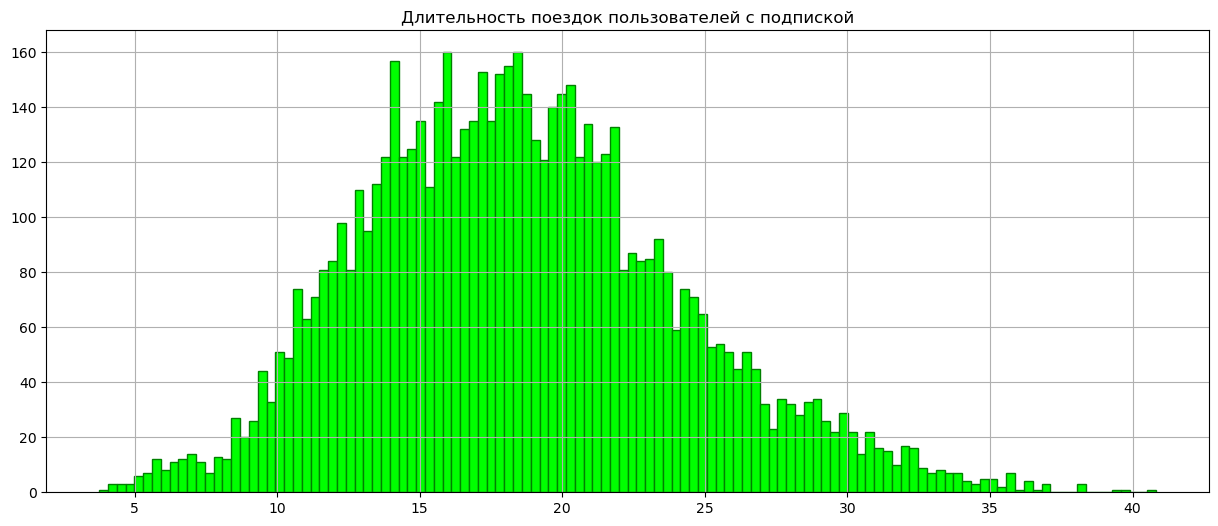

In [52]:
#Визуализация длительности поездок пользователей с подпиской:
plt.figure(figsize=(15, 6))
data_subsc_on['duration'].hist(
    bins=120,
    color='lime',
    edgecolor='green'
    )
plt.title('Длительность поездок пользователей с подпиской')
plt.show()

**Выводы:**\
Несмотря на то, что доли пользователей обоих профилей приблизительно равны (54% и 46%), пользователи без подписки совершили почти в 2 раза больше поездок, т.е. активнее пользуются сервисом.\
У пользователей без подписки также более разнообразные дистанции поездок, среднее расстояние при этом у обоих профилей примерно одинаковое.\
У пользователей обоих типов подписок примерно равное среднее время поездки (18 и 19 минут, если округлять в большую сторону), распределения длительности тоже схожи.


#### Шаг 5. Подсчёт выручки

In [53]:
#Округление длительности поездок в сторону большего целого:
data['duration'] = np.ceil(data['duration'])

In [54]:
#Агрегированные данные по поездкам каждого пользователя:
data_rides_agg = data.pivot_table(
    index=('user_id', 'month'), #Столбцы, по которым группируем данные
    values=('distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee', 'subscription_type'), #Столбцы, к которым применяем функции и которые хотим отобразить в таблице
    aggfunc={
        'distance': ('count', 'sum'),
        'duration': 'sum',
        'minute_price': 'first',
        'start_ride_price': 'first',
        'subscription_fee': 'first',
        'subscription_type': 'first'
    }) #Выбор функций, которые применяем к столбцам
#Корректируем названия столбцов после агрегации:
data_rides_agg.columns = ['rides_count', 'distance_sum', 'duration_sum', 'minute_price', 'start_ride_price', 'subscription_fee', 'subscription_type']
data_rides_agg.head(10)

rides_count  distance_sum  duration_sum  minute_price  \
user_id month                                                          
1       1                2   7027.511294          42.0             6   
        4                1    754.159807           7.0             6   
        8                2   6723.470560          46.0             6   
        10               2   5809.911100          32.0             6   
        11               3   7003.499363          56.0             6   
        12               2   6751.629942          28.0             6   
2       3                3  10187.723006          63.0             6   
        4                2   6164.381824          40.0             6   
        6                1   3255.338202          14.0             6   
        7                2   6780.722964          48.0             6   

               start_ride_price  subscription_fee subscription_type  
user_id month                                                        
1       1                     0               199             ultra  
        4                     0               199             ultra  
        8                     0               199             ultra  
        10                    0               199             ultra  
        11                    0               199             ultra  
        12                    0               199             ultra  
2       3                     0               199             ultra  
        4                     0               199             ultra  
        6                     0               199             ultra  
        7                     0               199             ultra

In [55]:
#Подсчёт выручки за каждый месяц:
data_rides_agg['revenue'] = (
    data_rides_agg['start_ride_price'] * data_rides_agg['rides_count'] #Cтоимость стартов поездок
    + data_rides_agg['duration_sum'] * data_rides_agg['minute_price'] #Стоимость общей продолжительности поездок
    + data_rides_agg['subscription_fee']) #Стоимость подписки
data_rides_agg.head(10)

rides_count  distance_sum  duration_sum  minute_price  \
user_id month                                                          
1       1                2   7027.511294          42.0             6   
        4                1    754.159807           7.0             6   
        8                2   6723.470560          46.0             6   
        10               2   5809.911100          32.0             6   
        11               3   7003.499363          56.0             6   
        12               2   6751.629942          28.0             6   
2       3                3  10187.723006          63.0             6   
        4                2   6164.381824          40.0             6   
        6                1   3255.338202          14.0             6   
        7                2   6780.722964          48.0             6   

               start_ride_price  subscription_fee subscription_type  revenue  
user_id month                                                                 
1       1                     0               199             ultra    451.0  
        4                     0               199             ultra    241.0  
        8                     0               199             ultra    475.0  
        10                    0               199             ultra    391.0  
        11                    0               199             ultra    535.0  
        12                    0               199             ultra    367.0  
2       3                     0               199             ultra    577.0  
        4                     0               199             ultra    439.0  
        6                     0               199             ultra    283.0  
        7                     0               199             ultra    487.0

**Выводы после подсчета выручки:**\
Датасеты успешно обединены, получены отдельные датасеты по пользователям с подпиской и без подписки,\
после чего создан датасет с агрегированными данными по отдельным пользователям и месяцам.\
На основании этого произведен расчет помесячной выручки по каждому пользователю сервиса.

#### Шаг 6. Проверка гипотез

In [56]:
#Выдвижение гипотез:
#Нулевая гипотеза: Средние продолжительности поездок пользователей с подпиской и без подписки равны
#Альтернативная гипотеза: Средняя продолжительность поездок пользователей с подпиской больше, чем у пользователей без подписки.

#Проверка гипотез:
alpha = 0.05
results = st.ttest_ind(
    data_subsc_on['duration'],
    data_subsc_off['duration'],
    equal_var=False,
    alternative='greater'
    )
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

5.6757813771289775e-37
Отвергаем нулевую гипотезу


In [57]:
#Выдвижение гипотез:
#Нулевая гипотеза: Средняя дистанция поездки пользователей с подпиской равна 3130 метров
#Альтернативная гипотеза: Средняя дистанция поездки пользователей с подпиской больше, чем 3130 метров.

#Проверка гипотез:
alpha = 0.05
results = st.ttest_1samp(
    data_subsc_on['distance'],
    3130,
    alternative='greater'
    )
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


In [58]:
#Выдвижение гипотез:
#Нулевая гипотеза: Средние месячные выручки от пользователей с подпиской и без подписки равны
#Альтернативная гипотеза: Средняя месячная выручка пользователей с подпиской выше, чем от пользователей без подписки.

#Проверка гипотез:
alpha = 0.05
results = st.ttest_ind(
    data_rides_agg.loc[data_rides_agg['subscription_type'] == 'ultra', 'revenue'],
    data_rides_agg.loc[data_rides_agg['subscription_type'] == 'free', 'revenue'],
    equal_var=False,
    alternative='greater'
    )
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

8.874140893976874e-40
Отвергаем нулевую гипотезу


In [59]:
#При статистическом анализе обращений пользователей в техподдержку до и после замены серверов
#необходимо использовать тест st.ttest_rel(), так как генеральные выборки взаимозависимы.
#Так как проверяется гипотеза о снижении количества обращений после замены серверов,
#тест лучше проводить левосторонний с параметром alternative='less'.

**Выводы после статистического анализа:**
1) При анализе продолжительности поездок пользователей с подпиской и без подписки гипотеза о том, что средние продолжительности равны, отвергнута. Средние продолжительности поездок не равны, почти нет случайных выборок, которые покажут, что средняя продолжительность поездок с подпиской равна или больше средней продолжительности. Значит, пользователи с платной подпиской наоборот, тратят меньше времени на поездки. Это может быть связано с тем, что по условиям тарифа старт поездки бесплатен, а значит, пользователи с платной подпиской могут позволить себе делать больше коротких поездок.

2) Гипотеза о том, что средняя дистанция поездки пользователей с подпиской равна 3130 метров не отвергнута, значение pvalue в 0.91 говорит о наличии убедительно большого количества случайных выборок, где среднее расстояние будет равно или больше 3130 метров.

3) При анализе выручки от пользователей с разными подписами гипотеза о том, что средние месячные выручки от пользователей с подпиской и без подписки равны, отвергнута. Практически отсутствуют случайные выбороки, где средние значения выручки могут быть равны.

4) При статистическом анализе обращений пользователей в техподдержку до и после замены серверов необходимо использовать тест st.ttest_rel(), так как генеральные выборки взаимозависимы. Так как проверяется гипотеза о снижении количества обращений после замены серверов, тест лучше проводить левосторонний с параметром alternative='less'.

#### Шаг 7. Распределения

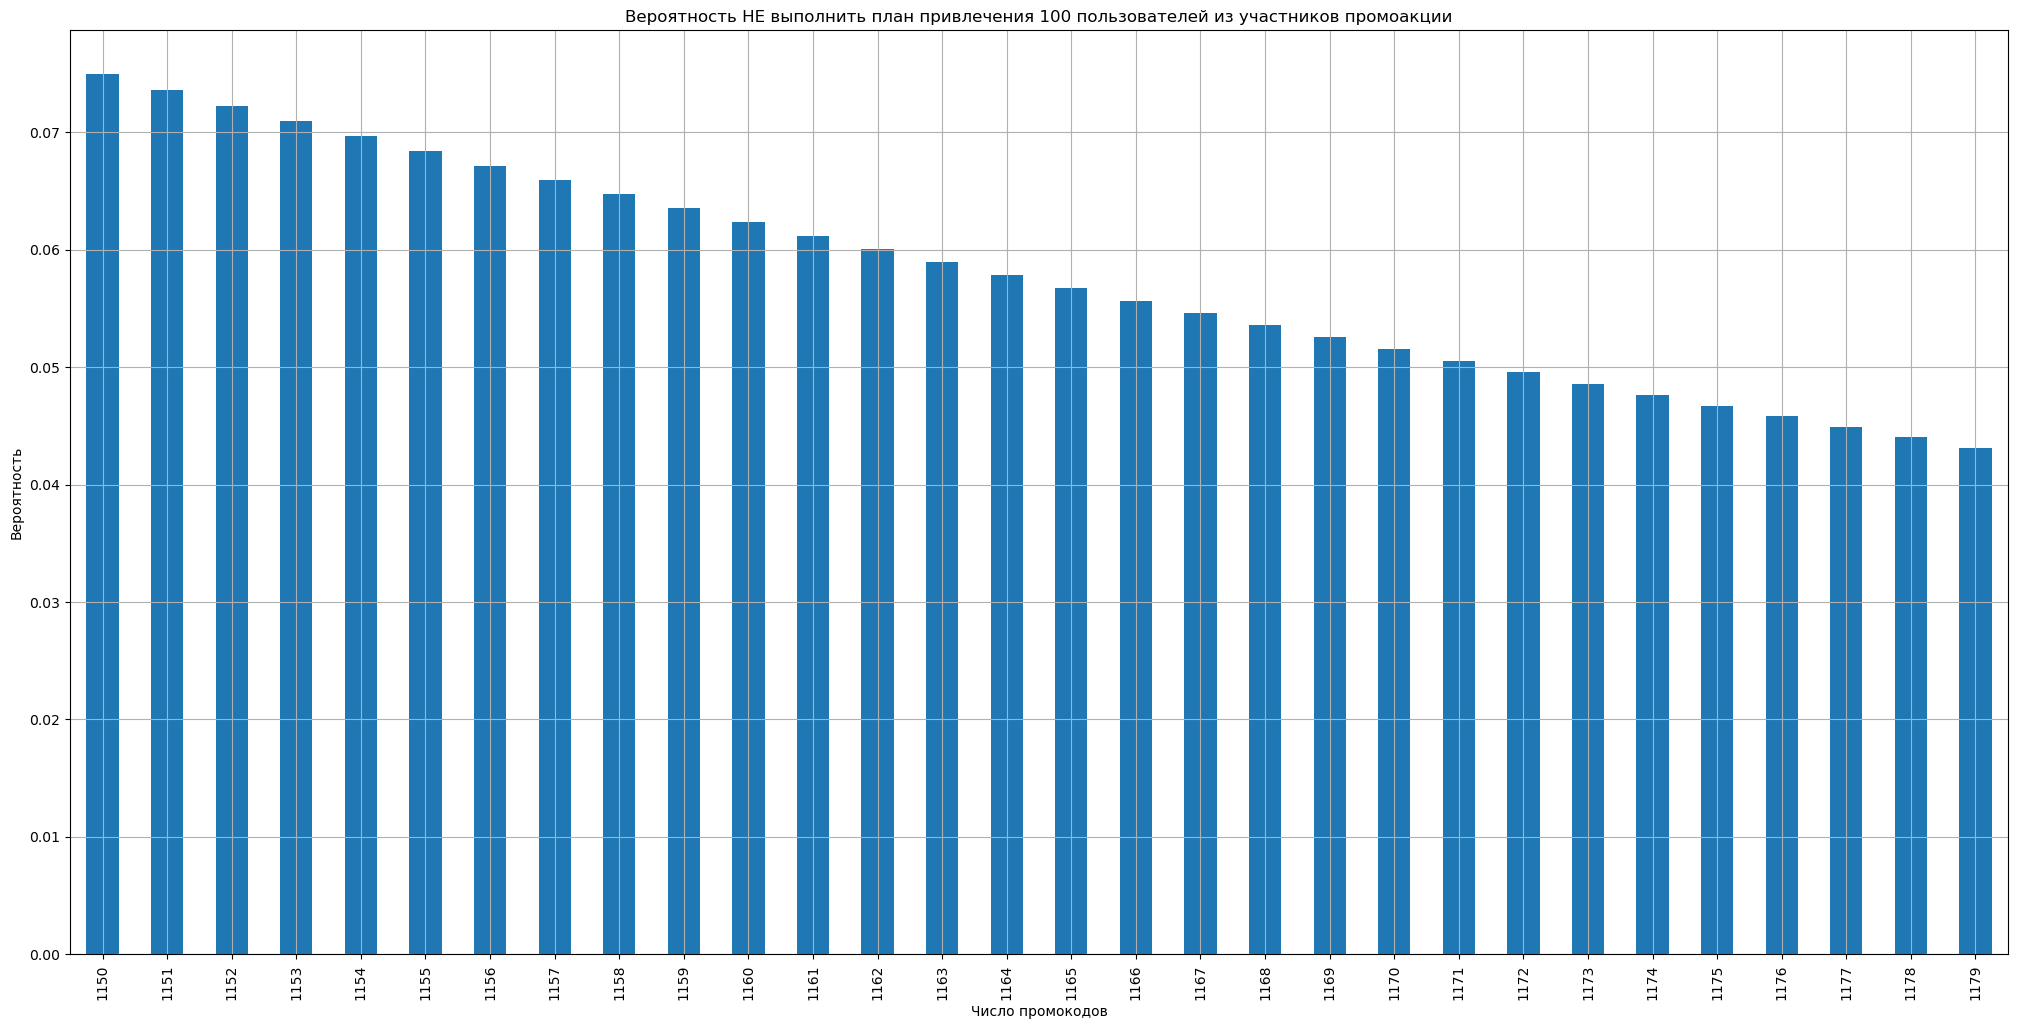

In [60]:
#Расчет параметров промоакции сервиса аренды самокатов.
#Импортируем модуль из SciPy:
from scipy.stats import binom
#Присваиваем параметры биномиального распределения:
k = 100
p = 0.1
#Создаем список для записи значений куммулятивной функции:
distr = pd.Series(dtype='float64')
#Подбираем диапазон возможного количества попыток. Для вероятности 10% очевидно,
#что количество промокодов должно быть больше 1000 шт.
for n in range(1150, 1180):
    distr.loc[n] = binom.cdf(k, n, p) #Вероятность привлечь 100 и менее пользователей (т.е. не выполнить план)
plt.figure(figsize=(25, 12))
distr.plot.bar(grid=True)
plt.title('Вероятность НЕ выполнить план привлечения 100 пользователей из участников промоакции')
plt.xlabel('Число промокодов')
plt.ylabel('Вероятность')
plt.show()

**Ответ:**\
Необходимо разослать минимум **1172** промокода, чтобы вероятность не выполнить план в 100 новых пользователей был менее 5%.

In [61]:
#Расчет параметров маркетинговой акции через push-уведомления.
#Импортируем модуль из SciPy:
from scipy.stats import norm
#Присваиваем параметры аппроксимации биномиального распределения нормальным:
n = 1000000
p = 0.4
mu = n * p
sigma = (n * p * (1 - p))**0.5
x = 399500
#Вычисляем куммулятивную функцию:
print(norm.cdf(399500, mu, sigma).round(2))

0.15


**Ответ:**\
Вероятность, что при рассылке 1 млн. push-уведомлений их откроют не более 399,5 тыс. пользователей, составляет 15%.

#### Шаг 8. Общие выводы

**Общий вывод статистического анализа показателей сервиса аренды самокатов:**

***1) Осуществлены импорт необходимых библиотек, открытие и просмотр датасетов***

***2) Предобработка данных***

Три датасета успешно загружены, тип даты приведен к формату pandas, тип подписки изменён на 0 и 1 для удобства работы, во всех датасетах проверены явные и неявные дубликаты, пропуски, произведена очистка от дубликатов. В датасете с поездками проверено, имеются ли аномально длительные поездки или дистанции поездок, а также нулевые значения, которые стоит удалить и не брать в анализ. В этом же датасете добавлен столбец с месяцем поездки. Наименования столбцов датасетов корректны для анализа и объединения данных.

***3) Исследовательский анализ данных***

В данных близко к равномерному представлено ***8*** городов, в которых работал сервис аренды самокатов.\
Пользователей без подписки: ***835*** (***54.0 %*** от всех пользователей)\
Пользователей без подписки: ***699*** (***46.0 %*** от всех пользователей)\
Средний возраст пользователя сервиса - ***25*** лет. Возраст пользователей нормально распределен от среднего.\
Среднее расстояние поездки - ***3000*** метров. Расстояние распределено близко к нормальному,\
но имеется второй пик, отражающий большое количество коротких поездок (примерно 600 метров).\
Средняя продолжительность поедки - ***17*** минут. Распределение продолжительности\
близко к нормальному, имеется выброс коротких поездок длительностью 1 минуты.

***4) Успешно объединены датасеты для дальнейшего анализа***

Несмотря на то, что доли пользователей обоих профилей приблизительно равны (54% и 46%), пользователи без подписки совершили почти в 2 раза больше поездок, т.е. активнее пользуются сервисом.\
У пользователей без подписки также более разнообразные дистанции поездок, среднее расстояние при этом у обоих профилей примерно одинаковое.\
У пользователей обоих типов подписок примерно равное среднее время поездки (18 и 19 минут, если округлять в большую сторону), распределения длительности тоже схожи.

***5) Подсчёт выручки***

Получены отдельные датасеты по пользователям с подпиской и без подписки,\
после чего создан датасет с агрегированными данными по отдельным пользователям и месяцам.\
На основании этого произведен расчет помесячной выручки по каждому пользователю сервиса.

***6) Проверка гипотез***

- При анализе продолжительности поездок пользователей с подпиской и без подписки гипотеза о том, что средние продолжительности равны, отвергнута. Средние продолжительности поездок не равны, почти нет случайных выборок, которые покажут, что средняя продолжительность поездок с подпиской равна или больше средней продолжительности. Значит, пользователи с платной подпиской наоборот, тратят меньше времени на поездки. Это может быть связано с тем, что по условиям тарифа старт поездки бесплатен, а значит, пользователи с платной подпиской могут позволить себе делать больше коротких поездок.


- Гипотеза о том, что средняя дистанция поездки пользователей с подпиской равна 3130 метров не отвергнута, значение pvalue в 0.91 говорит о наличии убедительно большого количества случайных выборок, где среднее расстояние будет равно или больше 3130 метров.


- При анализе выручки от пользователей с разными подписами гипотеза о том, что средние месячные выручки от пользователей с подпиской и без подписки равны, отвергнута. Практически отсутствуют случайные выбороки, где средние значения выручки могут быть равны.


- При статистическом анализе обращений пользователей в техподдержку до и после замены серверов необходимо использовать тест st.ttest_rel(), так как генеральные выборки взаимозависимы. Так как проверяется гипотеза о снижении количества обращений после замены серверов, тест лучше проводить левосторонний с параметром alternative='less'.

***7) Подбор распределения и расчёт количества промокодов***

Необходимо разослать минимум **1172** промокода, чтобы вероятность не выполнить план в 100 новых пользователей был менее 5%.\
Вероятность, что при рассылке 1 млн. push-уведомлений их откроют не более 399,5 тыс. пользователей, составляет **15%**.

**Рекомендации отделу маркетинга:**\
Несмотря на то, что популярность подписки не сильно уступает профилю без подписки, пользователи без подписки совершают почти в 2 раза больше поездок, активнее пользуются сервисом.\
Пользователи с подпиской не чувствуют выгоду от подписки, а сервису это не приносит дополнительной выручки (гипотеза о такой же или большей выручке от пользователей с подпиской не подтвердилась).\
Необходимо создать стимулы активнее пользоваться сервисом обладателями подписки, пересмотреть условия тарифа, в маркетинге сделать акцент на продвижение платной подписки.